# MOMENTUM TRADING STRATEGY

## stocks screening methodology
1.   filter 50 best performing stocks over past 12 months 
2.   filter 30 best performing stocks over past 6 months from above list
3.   filter 10 best performing stocks over past 3 months from above list


### Imports

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline 

In [3]:
# pip install yfinance
# pip install update pandas_datareader

In [4]:
yf.pdr_override()

### Extracting tickers 

In [5]:
def get_nifty_tickers():
    i = 1
    for _ in range(5):
        try:
            nifty50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_50")[i].Symbol.to_list()
        except:
            i+=1
    i = 1
    for _ in range(5):
        try:
            niftynext50 = pd.read_html("https://en.wikipedia.org/wiki/NIFTY_Next_50")[i].Symbol.to_list()
        except:
            i+=1
    nifty50tickers = [x + '.NS' for x in nifty50]
    niftynext50tickers = [x + '.NS' for x in niftynext50]
    tickers = nifty50tickers + niftynext50tickers
    return tickers

In [6]:
# get all nasdaq tickers 
nasdaq_tickers = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4].Ticker.to_list()


In [7]:
# gets all sp500 tickers 
sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol.to_list()

In [8]:
sp500_tickers[:10]

['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP']

In [10]:
def get_tickers(market = 'SP500'):
    """Get list of tickers from Wikipedia

    Args:
        market (str, optional): market tickers. Defaults to 'SP500'.

    Raises:
        ValueError: wrong market type string

    Returns:
        list: list of tickers
    """
    if market == 'SP500':
        return pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0].Symbol.to_list()
    elif market == 'NASDAQ':
        return pd.read_html('https://en.wikipedia.org/wiki/NASDAQ-100')[3].Ticker.to_list()
    elif market == 'NSE':
        return get_nifty_tickers()
    else:
        raise ValueError('Invalid market name')

In [18]:
sp500_tickers = get_tickers()

### DataPrep

In [11]:
sp500 = yf.download(sp500_tickers,start='2010-01-01')['Adj Close']

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [12]:
type(dt.datetime.now())

datetime.datetime

In [13]:
sp500 = sp500.dropna(axis=1)

In [14]:
sp500.index = pd.to_datetime(sp500.index)

In [15]:
mtl = (sp500.pct_change()+1)[1:].resample("M").prod()
mtl.head(5)

,A,AAL,AAP,AAPL,ABC,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XRAY,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.895527,1.113208,0.976968,0.897435,1.023658,0.979189,0.994302,0.974328,0.870855,0.851279,...,0.979828,0.902169,0.967480,0.985768,0.931743,0.949052,0.980644,0.938354,0.910359,1.423106
2010-02-28,1.122369,1.380414,1.034221,1.065396,1.031652,1.025312,1.034107,0.975116,1.072755,1.084570,...,1.135342,1.012532,1.027311,1.001443,1.015428,0.986877,0.985677,1.017933,1.094636,0.977875
2010-03-31,1.093134,1.002729,1.028855,1.148470,1.031384,0.970523,1.030684,1.049537,1.020779,0.992337,...,1.059356,1.120544,1.192858,1.030484,1.030462,1.055621,1.136714,1.032618,1.036052,1.177994
2010-04-30,1.054377,0.961905,1.075859,1.111021,1.066736,0.979328,0.991213,1.049416,0.949958,1.038515,...,1.100990,1.094973,1.163656,1.025944,1.011795,1.050745,1.112381,1.028885,0.981419,1.315476
2010-05-31,0.892443,1.248939,1.147672,0.983875,1.016527,0.929633,0.972744,0.859762,0.954762,0.982144,...,0.888825,0.859855,0.953686,0.942069,0.898194,0.884857,0.965346,0.918240,0.946644,0.833923


### Dataprep function

In [16]:
def data_prep(tickers,start,end=dt.datetime.now(),adjust=False):
    """ Gets the data from yahoo finance and returns the monthly total returns

    Args:
        tickers (list): list of tickers in yahoo finance format
        start (datetime.datetime): start date
        end (datetime.datetime, optional): end date. Defaults to dt.datetime.now().
        adjust (bool, optional): apply adjustment to price. Defaults to False.

    Returns:
        dataframe: returns processed list of mtl returns of specified tickers
    """
    df = yf.download(tickers,start,end,auto_adjust=adjust)['Close']
    df = df.dropna(axis=1)
    df.index = pd.to_datetime(df.index)
    mtl = (df.pct_change()+1)[1:].resample("M").prod()
    return mtl

In [19]:
mtl = data_prep(sp500_tickers,start='2010-01-01')

[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No timezone found, symbol may be delisted


In [25]:
def get_rolling_ret(df,n):
  """get the rolling returns"""
  return df.rolling(n).apply(np.prod)

In [26]:
ret_12, ret_6 , ret_3,ret_1 = get_rolling_ret(mtl,12),get_rolling_ret(mtl,6),get_rolling_ret(mtl,3),get_rolling_ret(mtl,1)

In [30]:
def get_top(date,criteria='A'):
  """ give the top 10 stocks based on the criteria

  Args:
      date (str): date in the format 'YYYY-MM-DD'
      criteria (str, optional): criteria for picking stocks. Defaults to 'A'.
        'A' - top 50(12 months) - top 30(6 months) - top 10(3 months)
        'B' - top 10(3 months)
        'C' - top 10(1 months)
  Returns:
      list: top 10 stocks
  """
  if criteria == 'A':
    top_50=ret_12.loc[date].nlargest(50).index
    top_30=ret_6.loc[date,top_50].nlargest(30).index
    top_10=ret_3.loc[date,top_30].nlargest(10).index
  elif criteria == 'B':
    top_10 = ret_3.loc[date].nlargest(10).index
  elif criteria == 'C':
    top_10 = ret_1.loc[date].nlargest(10).index
  else:
    print('invalid option')
    return None
  return top_10

In [31]:
get_top('2010-12-31',criteria='B')

Index(['URI', 'RCL', 'AIG', 'CF', 'FCX', 'SWKS', 'BWA', 'F', 'ON', 'SLB'], dtype='object')

In [38]:
portfolio=mtl.loc['2010-12-31':,get_top('2010-12-31','B')][1:2] #pickup next months returns 
portfolio

,URI,RCL,AIG,CF,FCX,SWKS,BWA,F,ON,SLB
Date,,,,,,,,,,
2011-01-31,1.171429,0.955319,0.700278,0.999186,0.905571,1.109675,0.931454,0.94997,1.118421,1.065748


#Testing strategy with equal weighted allocation

In [39]:
portfolio.mean(axis=1).values[0]

0.9907051012378953

In [43]:
def pf_performance(date,criteria = 'A'):
  portfolio = mtl.loc[date:,get_top(date,criteria)][1:2]
  return portfolio.mean(axis=1).values[0]

In [44]:
pf_performance('2010-12-31','B')

0.9907051012378953

In [67]:
def gen_returns(func=pf_performance,criteria='A'):
  returns=[]
  if criteria=='A':
    i = 12
  elif criteria=='B':
    i = 3
  else:
    i = 1
  for date in mtl.index[i:-1]:
    returns.append(pf_performance(date))
  returns=pd.DataFrame(returns,index=mtl.index[i:-1],columns=['returns'])
  return returns

In [68]:
strat = gen_returns()

In [50]:
nas_df = yf.download('^IXIC',start='2010-01-01')['Adj Close'].pct_change()+1
nas_df=nas_df['2011-1-31':]

[*********************100%***********************]  1 of 1 completed


In [51]:
sp500_df=yf.download('^GSPC',start='2010-01-01')['Adj Close'].pct_change()+1
sp500_df=sp500_df['2011-1-31':]

[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Date'>

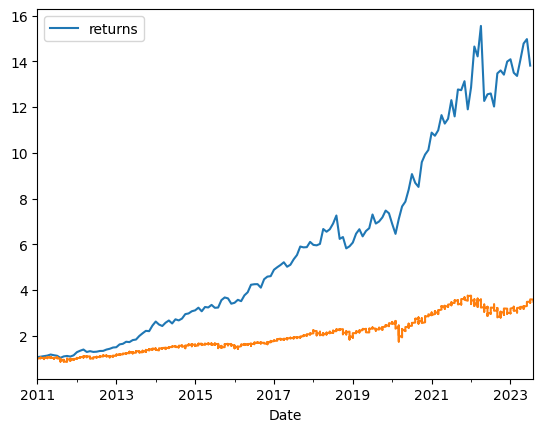

In [69]:
#strat1.cumprod().plot()
strat.cumprod().plot()
sp500_df.cumprod().plot()

#Testing strategy with mean variance portfolio
Refer to Finance slides for more info


##calculating daily returns

In [59]:
dailylr = np.log(sp500_df/sp500_df.shift(1)).dropna()

In [60]:
dailypct = sp500_df.pct_change().dropna()

In [61]:
dailypct.head()

Date
2011-02-01    0.008962
2011-02-02   -0.019097
2011-02-03    0.005091
2011-02-04    0.000529
2011-02-07    0.003346
Name: Adj Close, dtype: float64

In [62]:
dailylr.head()

Date
2011-02-01    0.008922
2011-02-02   -0.019282
2011-02-03    0.005078
2011-02-04    0.000529
2011-02-07    0.003341
Name: Adj Close, dtype: float64

##function to calculate cov matrix

In [63]:
ret1 = dailypct[:'2011-01-31']
np.shape(ret1[-251:])

(0,)

In [64]:
ret1.mean()

nan

In [65]:
def ret_matrix(stocks,date):
  returns = dailypct[:date][-251:]
  negative_returns=returns[returns<0]
  negative_returns=negative_returns.replace(np.nan,0)
  negative_returns = negative_returns[stocks].T
  mean_returns = returns.mean()
  mean_returns = mean_returns[stocks]
  returns = returns[stocks].T
  return np.cov(returns),mean_returns,np.cov(negative_returns)


In [66]:
ret_matrix(get_top1('2010-12-31'),'2010-12-31')[1]

KeyError: "None of [Index(['URI', 'RCL', 'AIG', 'SWKS', 'BWA', 'F', 'PXD', 'LVS', 'FTNT', 'WYNN'], dtype='object')] are in the [index]"

##function to calculate portfolio performance returns, std

In [67]:
def portfolio_performance(mean_returns,cov_matrix,weights):
  returns = np.sum(mean_returns*weights)
  std = np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights)))*np.sqrt(252)
  return returns, std

In [68]:
weights = np.ones(10)*0.1

In [69]:
cov_matrix , meanReturns, sortino_matrix = ret_matrix(get_top1('2010-12-31'),'2010-12-31')
returns, std = portfolio_performance(meanReturns,sortino_matrix,weights)

KeyError: "None of [Index(['URI', 'RCL', 'AIG', 'SWKS', 'BWA', 'F', 'PXD', 'LVS', 'FTNT', 'WYNN'], dtype='object')] are in the [index]"

In [70]:
print(round(returns*100,2),round(std*100,2))

TypeError: type list doesn't define __round__ method

In [71]:
import scipy.optimize as sc

##maximise Sharpe ratio

In [ ]:
def negativeSR(weights,meanReturns,cov_matrix,riskfreerate=0):
  preturns, pstd = portfolio_performance(meanReturns,cov_matrix,weights)
  return -(preturns-riskfreerate)/pstd

def maxSR(meanReturns,cov_matrix,riskfreerate = 0,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix,riskfreerate)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(negativeSR,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

In [ ]:
result=maxSR(meanReturns,cov_matrix)

In [ ]:
final_weights=np.round(result['x'],4)

In [ ]:
finalreturn = np.sum(portfolio1*final_weights,axis=1)
finalreturn[0]

1.0407640506852032

Minimise variance - mean variance portfolio

In [ ]:
def mean_variance(weights,meanReturns,cov_matrix):
  mean_var_returns, mean_var_std = portfolio_performance(meanReturns,cov_matrix,weights)
  return mean_var_std

def MV_portfolio(meanReturns,cov_matrix,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(mean_variance,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

In [ ]:
result_mv = MV_portfolio(meanReturns,cov_matrix)
final_weights_mv=np.round(result_mv['x'],4)
finalreturn_mv = np.sum(portfolio1*final_weights_mv,axis=1)
finalreturn_mv[0]

1.0572540958916794

## combined portfolio function

### maximising Sharpe ratio

In [ ]:
def ret_matrix(stocks,date):
  returns = dailypct[:date][-251:]
  negative_returns=returns[returns<0]
  negative_returns=negative_returns.replace(np.nan,0)
  negative_returns = negative_returns[stocks].T
  mean_returns = returns.mean()
  mean_returns = mean_returns[stocks]
  returns = returns[stocks].T
  return np.cov(returns),mean_returns,np.cov(negative_returns)

def negativeSR(weights,meanReturns,cov_matrix,riskfreerate=0):
  preturns, pstd = portfolio_performance(meanReturns,cov_matrix,weights)
  return -(preturns-riskfreerate)/pstd

def maxSR(meanReturns,cov_matrix,riskfreerate = 0,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix,riskfreerate)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(negativeSR,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

def maximising_sharpe_ratio(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result=maxSR(meanReturns,cov_matrix)
  final_weights=np.round(result['x'],4)
  finalreturn = np.sum(current_portfolio*final_weights,axis=1)
  return finalreturn[0]

def maximising_sortino_ratio(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result=maxSR(meanReturns,sortino_matrix)
  final_weights=np.round(result['x'],4)
  finalreturn = np.sum(current_portfolio*final_weights,axis=1)
  return finalreturn[0]

### Minimising variance

In [ ]:
def mean_variance(weights,meanReturns,cov_matrix):
  mean_var_returns, mean_var_std = portfolio_performance(meanReturns,cov_matrix,weights)
  return mean_var_std

def MV_portfolio(meanReturns,cov_matrix,constraintset= (0,1)):
  "minimise the negative sharpe ratio"
  args = (meanReturns,cov_matrix)
  constraints = ({'type':'eq','fun':lambda x: np.sum(x)-1})
  bounds = tuple(constraintset for asset in range(10))
  result = sc.minimize(mean_variance,np.ones(10)*0.1,args=args,method = 'SLSQP',bounds=bounds,constraints=constraints)
  return result

def minimise_variance(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result_mv = MV_portfolio(meanReturns,sortino_matrix)
  final_weights_mv=np.round(result_mv['x'],4)
  finalreturn_mv = np.sum(current_portfolio*final_weights_mv,axis=1)
  return finalreturn_mv[0]

def minimise_downside_var(date):
  current_portfolio = mtl.loc[date:,get_top2(date)][1:2]
  cov_matrix , meanReturns,sortino_matrix = ret_matrix(get_top2(date),date)
  result_mv = MV_portfolio(meanReturns,cov_matrix)
  final_weights_mv=np.round(result_mv['x'],4)
  finalreturn_mv = np.sum(current_portfolio*final_weights_mv,axis=1)
  return finalreturn_mv[0]  

In [ ]:
mtl.index[0:13]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31', '2010-11-30', '2010-12-31',
               '2011-01-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [ ]:
SR_returns = []
for date in mtl.index[11:-1]:
  SR_returns.append(maximising_sharpe_ratio(date))

In [ ]:
strat3=pd.Series(SR_returns,index=mtl.index[12:])
strat4=pd.Series([i - 0.003 for i in SR_returns],index=mtl.index[12:])

In [ ]:
MV_returns = []
for date in mtl.index[11:-1]:
  MV_returns.append(minimise_variance(date))

In [ ]:
strat5=pd.Series(MV_returns,index=mtl.index[12:])
strat6=pd.Series([i - 0.003 for i in MV_returns],index=mtl.index[12:])

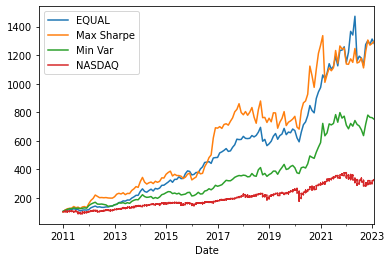

In [ ]:
(strat1.cumprod()*100).plot()
(strat3.cumprod()*100).plot()
(strat5.cumprod()*100).plot()
(sp500_df.cumprod()*100).plot()
plt.legend(['EQUAL','Max Sharpe','Min Var','NASDAQ']);

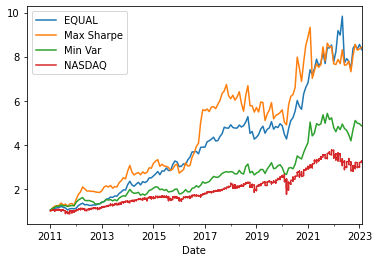

In [ ]:
strat2.cumprod().plot()
strat4.cumprod().plot()
strat6.cumprod().plot()
sp500_df.cumprod().plot()
plt.legend(['EQUAL','Max Sharpe','Min Var','NASDAQ']);

In [ ]:
def drawdown(data):
  Roll_Max = data['Adj Close'].cummax()
  Daily_Drawdown = data['Adj Close']/Roll_Max - 1.0
  Max_Daily_Drawdown = Daily_Drawdown.cummin()
  return Max_Daily_Drawdown

